In [4]:
from rdflib import Graph, URIRef
from rdflib.namespace import PROV, RDFS, SDO
from rdflib.namespace import Namespace
from rdflib.tools.rdf2dot import rdf2dot

from IPython.display import display, Image
import pydotplus
import io

DQV = Namespace("http://www.w3.org/ns/dqv#")

g = Graph()

g.namespace_manager.bind("dqv", URIRef("http://www.w3.org/ns/dqv#"))

# define subjects
worker = URIRef(":worker")
iq_assessment = URIRef(":iq_assessment")
target_item = URIRef(":target_item")

# add triples starting from worker
g.add((worker, RDFS.subClassOf, SDO.Person))

# add triples starting from assessment
g.add((iq_assessment, RDFS.subClassOf, DQV.QualityMeasurement))
g.add((iq_assessment, PROV.wasAttributedTo, worker))
g.add((iq_assessment, DQV.computedOn, target_item))

# add triples pointing to assessment
g.add((DQV.dimension, DQV.inDimension, iq_assessment))
g.add((DQV.metric, DQV.isMeasurementOf, iq_assessment))
g.add((target_item, DQV.hasQualityMeasurement, iq_assessment))

# add triples starting from target
g.add((target_item, RDFS.subClassOf, SDO.DigitalDocument))

print(g.serialize())


@prefix dqv: <http://www.w3.org/ns/dqv#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

dqv:dimension dqv:inDimension <:iq_assessment> .

dqv:metric dqv:isMeasurementOf <:iq_assessment> .

<:target_item> rdfs:subClassOf schema:DigitalDocument ;
    dqv:hasQualityMeasurement <:iq_assessment> .

<:worker> rdfs:subClassOf schema:Person .

<:iq_assessment> rdfs:subClassOf dqv:QualityMeasurement ;
    dqv:computedOn <:target_item> ;
    prov:wasAttributedTo <:worker> .




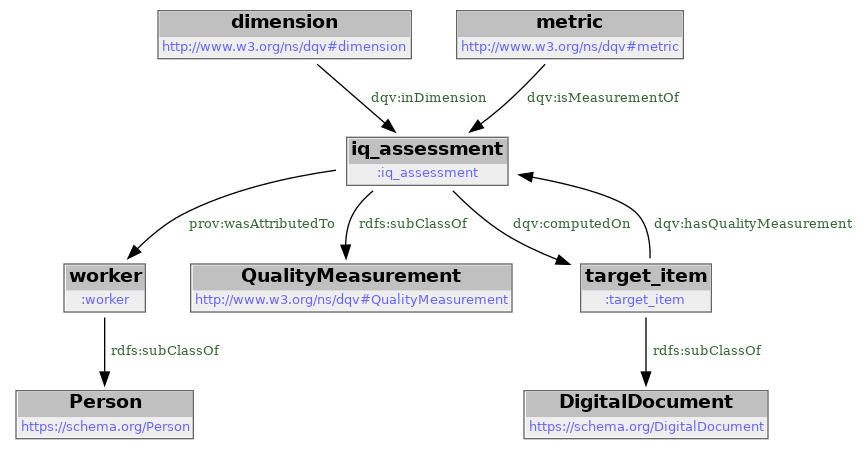

In [5]:
stream = io.StringIO()
rdf2dot(g, stream, opts={display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))

Metadata (properties) of describing features as resource:
- label
- class
- datatype
- range